In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.model_selection import cross_val_score

In [36]:
df = pd.read_csv("./train.csv", usecols=['Survived', 'Age', 'Fare'])

In [37]:
df.fillna(df['Age'].mean(), inplace=True)

In [45]:
def functionTransformer(eqn):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]
    colTransformer = ColumnTransformer(
        [
            ('t1', FunctionTransformer(eqn), ['Fare'])
        ],
        remainder='passthrough'
    )

    xNew = colTransformer.fit_transform(x)

    clf = LogisticRegression()

    plt.figure(figsize=(14,2))

    plt.subplot(121)
    stats.probplot(x['Fare'], plot=plt)
    plt.title("Before Transformation")

    plt.subplot(122)
    stats.probplot(xNew['Fare'], plot=plt)
    plt.title("After Transformation")

    plt.show()

    print("Accuracy of Logistic Regression model: ", np.mean(cross_val_score(clf, xNew, y, scoring='accuracy', cv=10)))

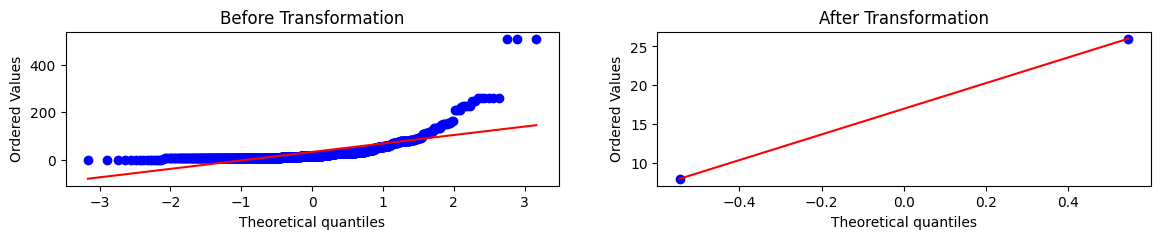

Accuracy of Logistic Regression model:  0.6589013732833957


In [46]:
functionTransformer(lambda x: x)

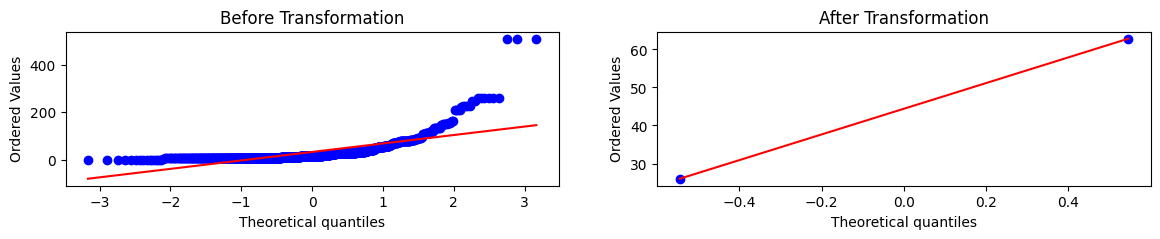

Accuracy of Logistic Regression model:  0.6442446941323345


In [47]:
functionTransformer(lambda x: x**2)

KeyError: 'Fare'

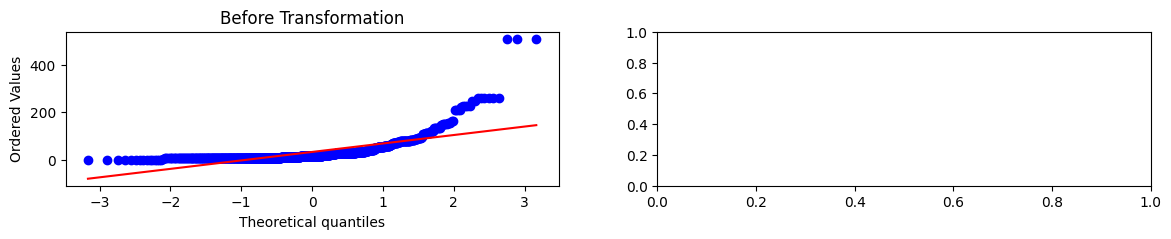

In [43]:
functionTransformer(lambda x: np.log1p(x))

KeyError: 'Fare'

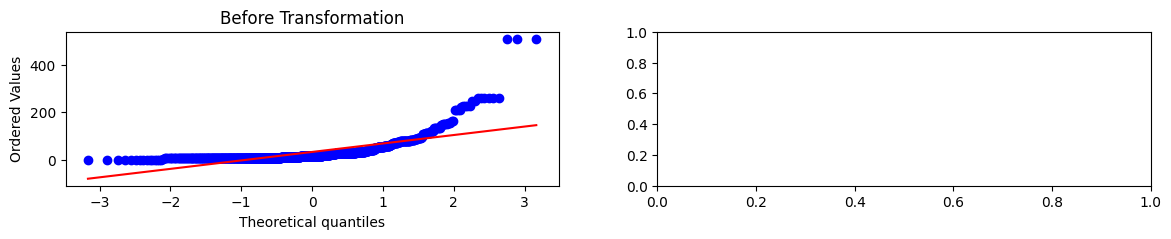

In [44]:
functionTransformer(lambda x: x**(1/2))